<a href="https://colab.research.google.com/github/chakirsami/Real_estate_project-/blob/main/Real_estate_project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      545 non-null    int64 
 1   area       545 non-null    int64 
 2   bedrooms   545 non-null    int64 
 3   bathrooms  545 non-null    int64 
 4   stories    545 non-null    int64 
 5   mainroad   545 non-null    object
 6   guestroom  545 non-null    object
 7   basement   545 non-null    object
 8   parking    545 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.4+ KB
Missing values per column:
 price        0
area         0
bedrooms     0
bathrooms    0
stories      0
mainroad     0
guestroom    0
basement     0
parking      0
dtype: int64


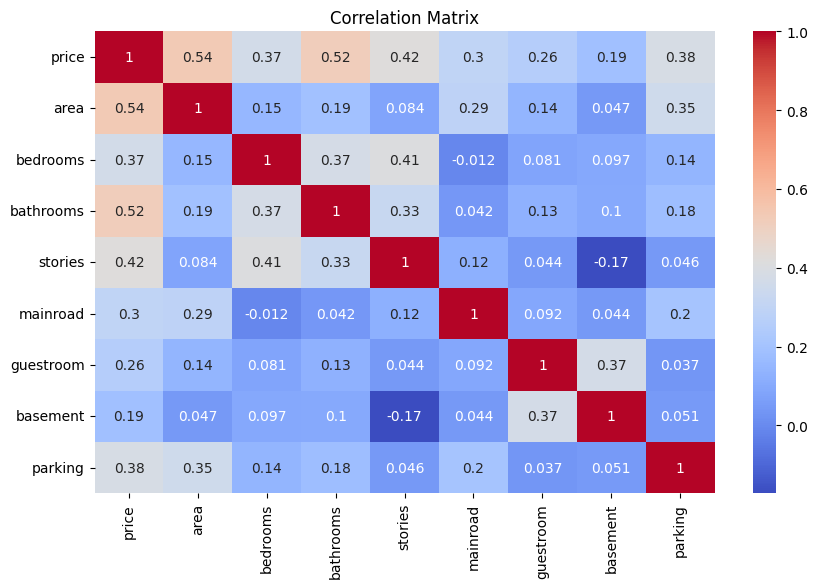

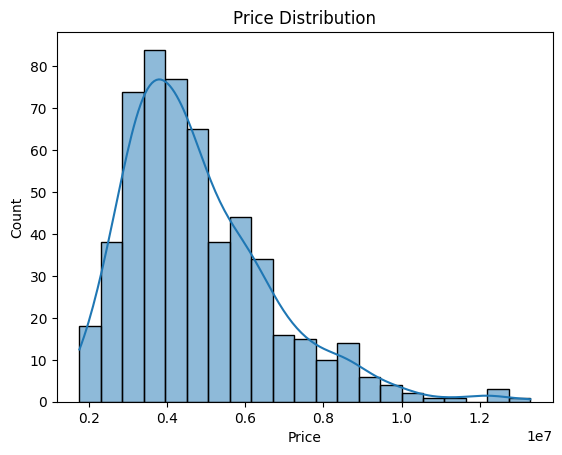

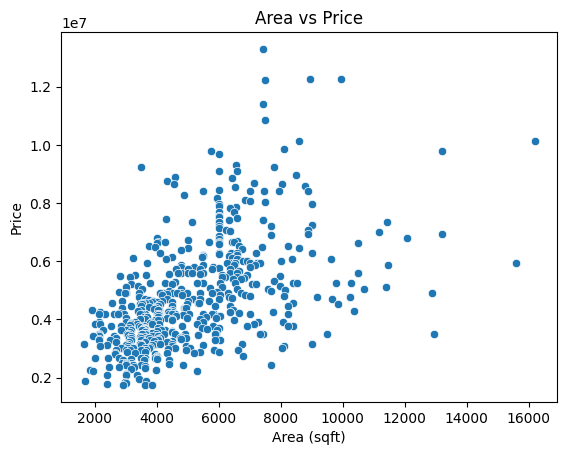

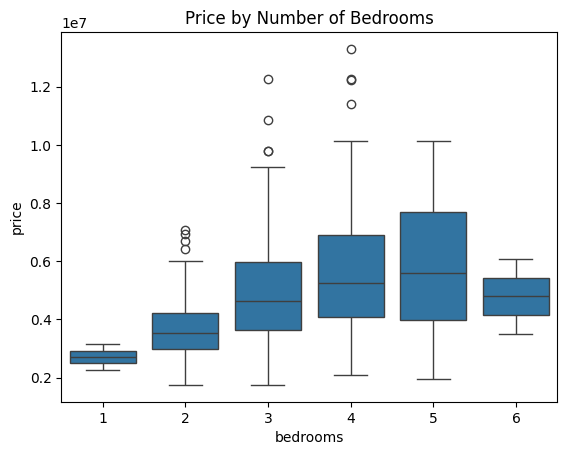

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#step 1 collect and load data
df = pd.read_csv("Housing.csv")
df.drop(columns=["hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], inplace=True)
df.head()
df.info()
df.describe()

#step 2 data cleaning
# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())
# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Convert categorical yes/no columns to binary
yes_no_columns = ['mainroad', 'guestroom', 'basement']
for col in yes_no_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})
# Check for duplicates
df.drop_duplicates(inplace=True)
# View cleaned data
df.head()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of prices
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

# Area vs Price scatterplot
sns.scatterplot(data=df, x='area', y='price')
plt.title("Area vs Price")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.show()

# Price by Number of Bedrooms
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title("Price by Number of Bedrooms")
plt.show()
